# Обработка данных

In [1]:
import numpy as np  # быстрые математические операции
import pandas as pd # для считывания данных

**pd.read_csv** - считывается структурированные данные из csv-таблицы (столбцы * строки образуют строгую таблицу) 

In [ ]:
Y = pd.read_csv('shifts.csv')

In [2]:
Y = pd.read_csv('shifts.csv', sep='\t') 
# разделитель по умолчанию sep=',', в данном случае пришлось заменить его на табуляцию

In [ ]:
Y[:20] # как видите, в ячейках могут встречаться запятые

При работе с csv через pandas, вы получаете объект под названием DataFrame, который состоит из строк и столбцов. Вы можете получать столбцы таким же образом, каким получаете элементы словаря.

In [3]:
Y['Language']

0                  Sanskrit
1                     Khmer
2             Ancient Greek
3                   Swahili
4                Lithuanian
5          Mandarin Chinese
6                 Icelandic
7                     Mehri
8                 Hungarian
9       Mongolian (Khalkha)
10                     Zulu
11                 Kilivila
12                     Fula
13                   Bezhta
14                  Russian
15                Icelandic
16                  Russian
17                 Nganasan
18                  Turkish
19                   Gagauz
20                   Gagauz
21                 Chamalal
22               Vietnamese
23                  Russian
24                  Lezgian
25                   Bezhta
26                  English
27                  English
28                   Polish
29                   Danish
               ...         
3678                  Langi
3679                  Maori
3680                Amharic
3681                   Geez
3682                

pandas не заставит вас смотреть все 3708 ячеек, но можно самостоятельно ограничить показ только верхними строками (шапкой)

In [4]:
Y['Language'].head()

0         Sanskrit
1            Khmer
2    Ancient Greek
3          Swahili
4       Lithuanian
Name: Language, dtype: object

или так

In [ ]:
Y['Language'][:10]

In [ ]:
Y.Language[:10] # если в названии столбца нет пробелов, то можно ещё и так

Короче, похоже на работу со списками и словарями сразу:

    Y['Language'][100:110]
    имя_датафрейма[название нужного столбика][номера нужных ячеек] (причём порядок можно менять)

In [ ]:
Y[100:110]['Language']

In [ ]:
Y['Language'][100:110]

Выбрать несколько строк = дать несколько номеров, значит, выбрать несколько столбцов = дать несколько названий

In [ ]:
Y[['Language', 'Language ID']][:12]

Посчитаем частоты языков

In [ ]:
Y['Language'].value_counts()[:10]

Столбик References почти пустой - давайте уберём его с помощью .drop()

In [ ]:
Y = Y.drop(columns='Reference')
Y.head()

Давайте посмотрим строки, где есть реализации для русского языка. Для этого в столбике Language нужно выбрать язык Russian, что делается вот так:

In [ ]:
Y[Y['Language'] == 'Russian'].head()

Ранее мы обращались к строкам с помощью индексов - в данном случае сами индексы можно вывести отдельно

In [ ]:
Y.index

In [ ]:
Y.loc[2001] # найдёт ячейку по индексу

In [ ]:
Y.loc[2000, 'Status'] = 'Accepted' # приписывание нового значения

In [ ]:
Y.loc[2000]

In [ ]:
Y.loc[2000:2010, 'Status'] = 'Accepted' # можно даже приписать сразу нескольким

In [ ]:
Y['Status'].loc[2000] = 1 # а вот так делать нельзя

In [ ]:
Y[:5]

In [ ]:
Y.loc[5][4]

In [ ]:
Y.iloc[5, 4]

- loc получает строки (или столбцы) с определенными метками из индекса.
- iloc получает строки (или столбцы) в определенных положениях индекса (так что он принимает только целые числа).

In [ ]:
Y.loc[3, 'Language']


In [ ]:
Y.iloc[3, 'Language']


In [ ]:
Y['Status'].unique()

#### Как тогда посмотреть всех контрибьюторов?

In [ ]:
Y...

#### Попробуйте вывести самого активного контрибьютора и языки, про которые он добавляет данные

In [ ]:
C = Y['']...

#### Также можно использовать всякие логические операции

In [5]:
Y[
    np.logical_and(
        Y['ID'] > 3500, 
        Y['Shift Type'] == 'Polysemy'
    )
].head()

,ID,Source,Direction,Target,Status,Contributor,Shift Type,Language,Language ID,Lexeme,Source/Sense1,Target/Sense2,Reference,Comments,Contributor.1
3471,3501,word,→,thing,Accepted,MB,Polysemy,Ancient Hebrew,anci1244,dābār,'word',"'matter: thing, something'",,(HALOT 211).,MB
3472,3502,trunk (of a tree),→,tribe,New,MB,Polysemy,German,stan1295,Stamm,'trunk (of a tree)',"'tribe, kindred, clan'",,,MB
3475,3505,to fall down,→,cheap,New,MB,Polysemy,Chaha,seba1251,wäṭäḳä-m,'fall','be cheap',,(LGur. I 126: LGur. 644). See ibid. for seman...,MB
3476,3506,to tell,→,to name,New,MB,Polysemy,Chaha,seba1251,barä,"'say, tell'","'call, name'",,(Hetzron 1977:135).,MB
3477,3507,to attack,—,to dance,New,MB,Polysemy,Chaha,seba1251,gašä-m,'to raid','to dance',,(Hetzron 1977:135).,MB


In [ ]:
rus_lexemes = Y[Y['Language'] == 'Russian']['Lexeme'].head()
rus_lexemes

In [ ]:
eng_lexemes = Y[Y['Language'] == 'English']['Lexeme'].head()
eng_lexemes

### Задание

1) Загрузите датасет из файла videogames.csv, посмотрите на него

2) Выведите все жанры игр, которые есть

3) Найдите жанр с наилучшими оценками (можно смотрть и score, и editors_choice)

4) Найдите игру с наилучшими и наихудшими оценками, вышедшую в год вашего рождения. Выведите их названия и платформы, для которых они были выпущены.

## Рисование графиков

In [6]:
wimport matplotlib.pyplot as plt

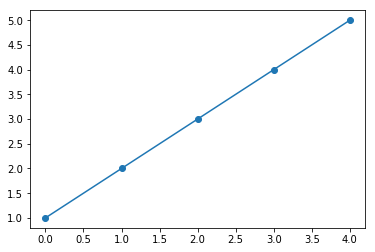

In [12]:
plt.plot([1, 2, 3, 4, 5], marker='o')
plt.show()

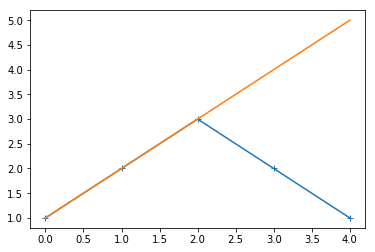

In [15]:
plt.plot([1, 2, 3, 2, 1], marker='+')
plt.plot([1, 2, 3, 4, 5])
plt.show()

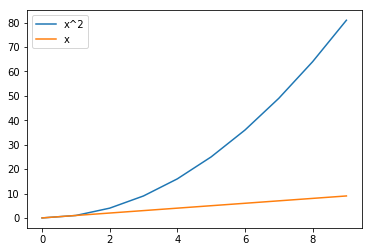

In [16]:
xs = range(10)
ys = [x**2 for x in xs] # наш стандартный генератор
plt.plot(xs, ys, label='x^2')
plt.plot(xs, xs, label='x')
plt.legend() # если не вызвать, то легенда не появится
plt.show()

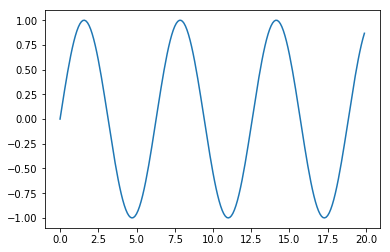

In [18]:
xs = np.arange(0, 20, 0.1) #  arange() аналогична range(), только вместо \списков возвращает массивы, и принимает не только целые значения
ys = np.sin(xs) # синус от каждого элемента массива
plt.plot(xs, ys)
plt.show()

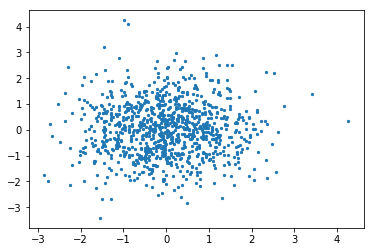

In [29]:
xs = np.random.normal(size=1000)
ys = np.random.normal(size=1000)
plt.scatter(xs, ys, s=5)
plt.show()

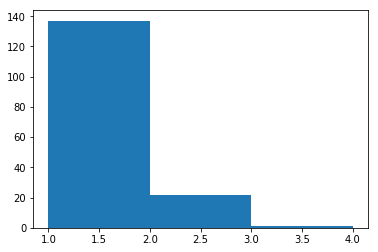

In [34]:
plt.hist(xs, bins=[1, 2, 3, 4])
plt.show()